In [12]:
import pandas as pd
import os
import numpy as np

# logs = pd.read_json("results/roberta-full/checkpoint-32691/trainer_state.json")
models = [model for model in os.listdir("results") if model !='archive' and os.path.isdir("results/"+model)]
logs = []
for model in models:
    if model.find("loria")==-1 and model.find("maptask")==-1 :
        print(f"Skipping {model} because pre-finetuned only")
        continue
    model_logs = pd.read_json(f"results/{model}/checkpoint-375/trainer_state.json")
    model_logs['model'] = model
    logs.append(model_logs)

logs = pd.concat(logs)
# list(map(lambda x: x['log_history'].apply(pd.Series), logs))

# unnest log_histry (which is a dict variable) into a dataframe
logs = pd.concat([
    logs['log_history'].apply(pd.Series),
    logs.drop(['epoch','log_history'], axis=1)
], axis=1)
logs = logs.groupby(['epoch', 'step', 'model']).agg(lambda x: np.nan if x.isnull().all() else x.iloc[0] if (x.iloc[0] == x).all() else x.dropna())
logs = logs.reset_index()
logs['finetuned']   = logs['model'].apply(lambda x: x.split('--')[1][0:13]=='open-subtitle') # 
logs['finetuning_language'] = logs['model'].apply(lambda x: x.split('--')[1][14:])
logs['base_model']  = logs['model'].apply(lambda x: x.split('--')[0])
logs['short_model'] = np.where( logs['finetuned'], logs['base_model']+'_finetuned-'+logs['finetuning_language'], logs['base_model'])
logs['dataset']     = logs['model'].apply(lambda x: x.split('--')[-2])
logs

Skipping xlm-roberta-base--open-subtitle-en-fr--last-3-layers because pre-finetuned only
Skipping xlm-roberta-base--open-subtitle-en--last-3-layers because pre-finetuned only
Skipping roberta-base--open-subtitle-en--last-3-layers because pre-finetuned only


,epoch,step,model,learning_rate,loss,eval_accuracy,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,...,max_steps,num_train_epochs,total_flos,trial_name,trial_params,finetuned,finetuning_language,base_model,short_model,dataset
0,0.8,100.0,roberta-base--maptask--head-layers-only,0.000846,2.2642,0.292482,2.047095,53.5752,18.124,0.299,...,375,3,1567756417720320,NaN,NaN,False,,roberta-base,roberta-base,maptask
1,0.8,100.0,roberta-base--open-subtitle-en--last-3-layers-...,0.000846,2.3173,0.267765,2.112025,41.9615,23.140,0.381,...,375,3,1567756417720320,NaN,NaN,True,en,roberta-base,roberta-base_finetuned-en,maptask
2,0.8,100.0,xlm-roberta-base--loria--head-layers-only,0.000846,2.4440,0.534501,2.044718,43.3936,22.377,0.369,...,375,3,1568023842502656,NaN,NaN,False,,xlm-roberta-base,xlm-roberta-base,loria
3,0.8,100.0,xlm-roberta-base--maptask--head-layers-only,0.000846,2.3454,0.253347,2.206171,42.8708,22.649,0.373,...,375,3,1567756417720320,NaN,NaN,False,,xlm-roberta-base,xlm-roberta-base,maptask
4,0.8,100.0,xlm-roberta-base--open-subtitle-en--last-3-lay...,0.000846,2.6092,0.200824,2.460876,62.4470,15.549,0.256,...,375,3,1568023842502656,NaN,NaN,True,en,xlm-roberta-base,xlm-roberta-base_finetuned-en,loria
5,0.8,100.0,xlm-roberta-base--open-subtitle-en--last-3-lay...,0.000846,2.3420,0.265705,2.197350,220.6277,4.401,0.073,...,375,3,1567756417720320,NaN,NaN,True,en,xlm-roberta-base,xlm-roberta-base_finetuned-en,maptask
6,0.8,100.0,xlm-roberta-base--open-subtitle-en-fr--last-3-...,0.000846,2.4719,0.554068,2.140960,55.5110,17.492,0.288,...,375,3,1568023842502656,NaN,NaN,True,en-fr,xlm-roberta-base,xlm-roberta-base_finetuned-en-fr,loria
7,0.8,100.0,xlm-roberta-base--open-subtitle-en-fr--last-3-...,0.000846,2.2952,0.248198,2.087952,53.2671,18.229,0.300,...,375,3,1567756417720320,NaN,NaN,True,en-fr,xlm-roberta-base,xlm-roberta-base_finetuned-en-fr,maptask
8,1.6,200.0,roberta-base--maptask--head-layers-only,0.000538,2.0032,0.358393,1.819979,49.6457,19.559,0.322,...,375,3,1567756417720320,NaN,NaN,False,,roberta-base,roberta-base,maptask
9,1.6,200.0,roberta-base--open-subtitle-en--last-3-layers-...,0.000538,2.0328,0.355304,1.844606,41.3521,23.481,0.387,...,375,3,1567756417720320,NaN,NaN,True,en,roberta-base,roberta-base_finetuned-en,maptask


In [3]:
"adlskdj"[0:2]

'ad'

Legend


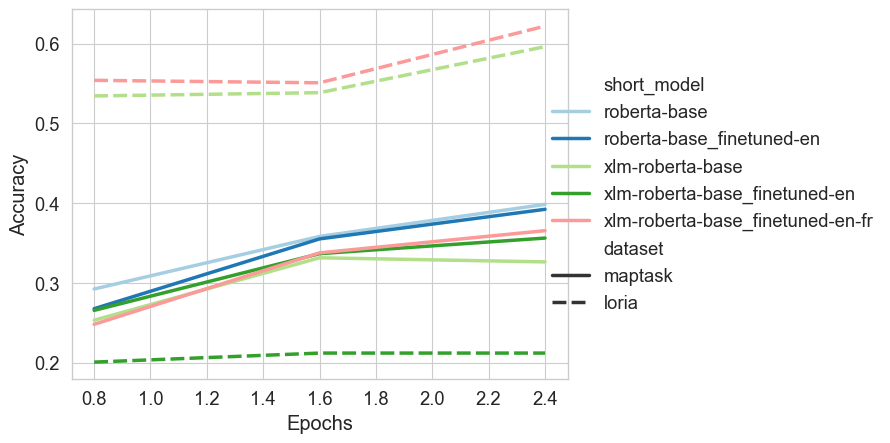

In [13]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

ax = sns.lineplot(x="epoch", y="eval_accuracy", hue='short_model', style="dataset", data=logs, palette="Paired")
ax.set(xlabel='Epochs', ylabel='Accuracy')
leg = ax.get_legend()
print(leg)
sns.move_legend(
    ax, "center right",
    bbox_to_anchor=(1.65, .5),
    # ncol=2,
    title=None,
    frameon=False,
)

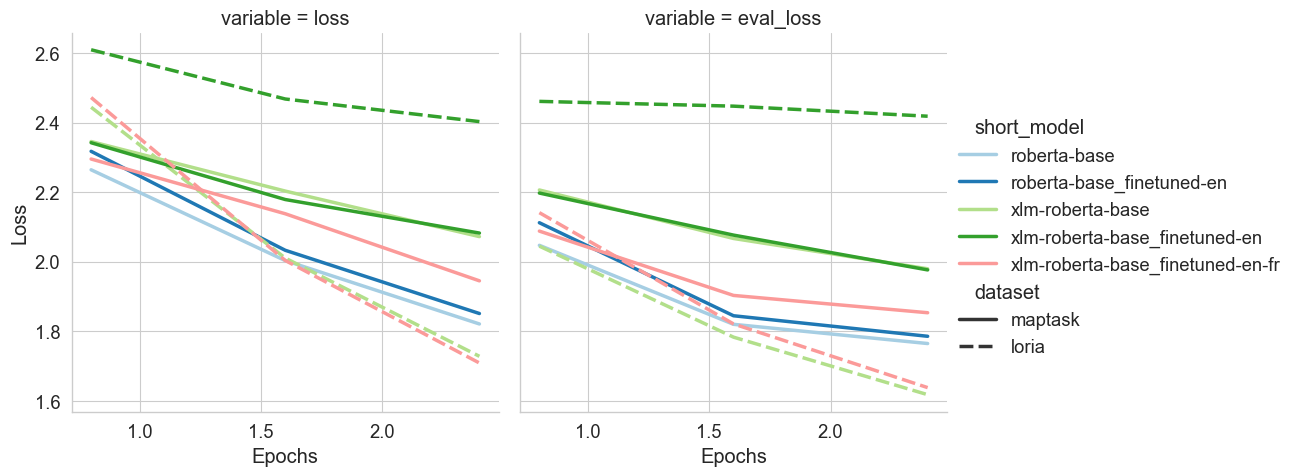

In [14]:
ax = sns.relplot(
    data=logs[['epoch', 'loss', 'eval_loss', 'short_model', 'dataset']].melt(id_vars=["epoch", "short_model", "dataset"]),
    x="epoch", y="value", hue="short_model", style="dataset",  col="variable",
    kind="line", palette="Paired"
)
ax.set(xlabel='Epochs', ylabel='Loss')


In [1]:
! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.6 MB/s eta 0:00:0000:0100:01
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 3.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.5 MB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


Found cached dataset miam (/Users/katossky/.cache/huggingface/datasets/miam/loria/1.0.0/3cb25c5337f9e60db1dc6d90344763a6ef79d7a4ac3c5f215ce6e8afe99db26c)


  0%|          | 0/3 [00:00<?, ?it/s]

/var/folders/cw/9gwwh07n5v90s7csr9bwwq940000gn/T/ipykernel_30064/3931676624.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


[Text(0.0, 0, '0%'),
 Text(0.025, 0, '2%'),
 Text(0.05, 0, '5%'),
 Text(0.07500000000000001, 0, '8%'),
 Text(0.1, 0, '10%'),
 Text(0.125, 0, '12%'),
 Text(0.15000000000000002, 0, '15%'),
 Text(0.17500000000000002, 0, '18%'),
 Text(0.2, 0, '20%'),
 Text(0.225, 0, '22%')]

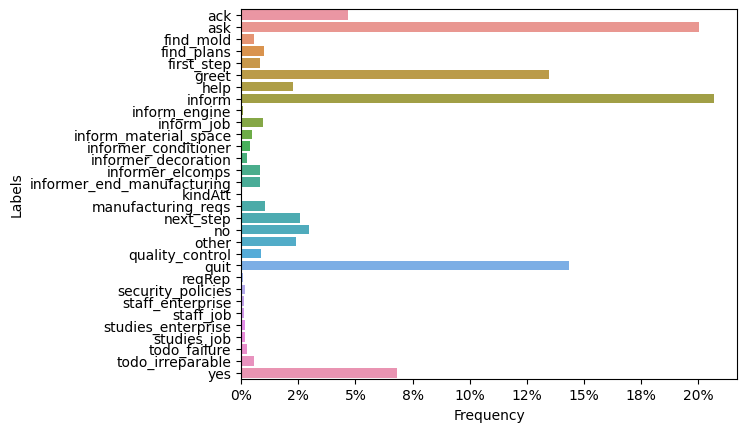

In [12]:
import seaborn as sns
import pandas as pd
import datasets

from datasets import load_dataset

dataset_name = "loria" # 'dihana' (Spanish), 'ilisten' (Italian), 'loria' (French), 'maptask' (English) or 'vm2' (German) 
dataset = load_dataset('miam', dataset_name)
frequencies = pd.DataFrame({
    'labels': dataset['train'].info.features['Label'].names,
    'frequency' : dataset['train'].to_pandas().groupby('Label').count()['Idx']/len(dataset['train'])
})

# make seaborn bar plot with frequencies['frequency'] and frequencies['frequency'] as label
# frenquency shown as percentage
ax = sns.barplot(y="labels", x="frequency", data=frequencies)
ax.set(xlabel='Frequency', ylabel='Labels')
ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
